# 1. Pre-Setup


## ⚠️ Turning off unneccessary warnings.


In [1]:
import warnings                         # Mengimpor modul warnings
warnings.filterwarnings('ignore')       # Menyaring semua jenis warning agar tidak ditampilkan di output.

## 📚 Libraries Import

Importing library for importing data and preprocessing data.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sp

## 📊 Data Import

Using pandas to import the data from "Obesity prediction.csv" as a dataframe -> Matrix Like object.


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ruchikakumbhar/obesity-prediction") + "/Obesity prediction.csv"

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ASUS\.cache\kagglehub\datasets\ruchikakumbhar\obesity-prediction\versions\1/Obesity prediction.csv


In [5]:
df = pd.read_csv(path)
df.head(5)

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
df['MTRANS'].value_counts()

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [7]:
categorical_columns = ['Gender', 'CAEC', 'CALC', 'MTRANS', 'Obesity']

for col in categorical_columns:
  print(df[col].value_counts().keys())

Index(['Male', 'Female'], dtype='object', name='Gender')
Index(['Sometimes', 'Frequently', 'Always', 'no'], dtype='object', name='CAEC')
Index(['Sometimes', 'no', 'Frequently', 'Always'], dtype='object', name='CALC')
Index(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike'], dtype='object', name='MTRANS')
Index(['Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_II',
       'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight',
       'Insufficient_Weight'],
      dtype='object', name='Obesity')


# 2. 🔍 Exploratory Data Analysis (EDA) dan Data Preprocessing


In [8]:
eda_df = df.copy()

## ℹ️ Data General Info

General Data Information including data types, null value counts, and the statistical info for each column.


### Columns and Data Types


In [9]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [10]:
eda_df.describe(include='all')

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


In [11]:
obesity_dist = eda_df['Obesity'].value_counts()
obesity_dist

Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

### Missing Data


In [12]:
print(eda_df.isnull().sum())
print()
print(f'Total missing data: {eda_df.isnull().sum().sum()}')

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

Total missing data: 0


There is no missing data in the dataset.


## 🔁 Duplicate Data

Checking for duplicate rows, and handling them. Because this is a dataset of people with Obesity category, then duplicate data does not matter because we are not accounting demography or the occurence of the same condition twice for each person, so we can remove the duplicate.


### Checking for Duplicate Data


In [13]:
print(f"Duplicate row count: {eda_df.duplicated().sum()}")

Duplicate row count: 24


In [14]:
print("Duplicated Data:")
indices = [i for i in eda_df.duplicated().index if eda_df.duplicated()[i]]
print(eda_df.loc[indices])

Duplicated Data:
     Gender   Age  Height  Weight family_history FAVC  FCVC  NCP        CAEC  \
98   Female  21.0    1.52    42.0             no   no   3.0  1.0  Frequently   
106  Female  25.0    1.57    55.0             no  yes   2.0  1.0   Sometimes   
174    Male  21.0    1.62    70.0             no  yes   2.0  1.0          no   
179    Male  21.0    1.62    70.0             no  yes   2.0  1.0          no   
184    Male  21.0    1.62    70.0             no  yes   2.0  1.0          no   
209  Female  22.0    1.69    65.0            yes  yes   2.0  3.0   Sometimes   
309  Female  16.0    1.66    58.0             no   no   2.0  1.0   Sometimes   
460  Female  18.0    1.62    55.0            yes  yes   2.0  3.0  Frequently   
467    Male  22.0    1.74    75.0            yes  yes   3.0  3.0  Frequently   
496    Male  18.0    1.72    53.0            yes  yes   2.0  3.0   Sometimes   
527  Female  21.0    1.52    42.0             no  yes   3.0  1.0  Frequently   
659  Female  21.0    1.

### Removing Duplicate Data


In [15]:
eda_df.drop_duplicates(inplace=True)
eda_df.reset_index(drop=True, inplace=True)
eda_df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2083,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2084,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2085,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [16]:
print(f"Row count after dropping duplicates: {eda_df.shape[0]}")

Row count after dropping duplicates: 2087


## 🔴 Outliers

Checking for rows with extreme numerical data points


### Checking for Continuous Data


In [17]:
# countinuous_columns = [attr for attr in df.dtypes.index if df.dtypes[attr] == 'int64' or df.dtypes[attr] == 'float64']
continuous_columns = ['Age', 'Height', 'Weight']
print(f"Continuous Columns: {continuous_columns}")

Continuous Columns: ['Age', 'Height', 'Weight']


In [18]:
continuous_indices = [i for i in range(len(eda_df.columns.values)) if eda_df.columns.values[i] in continuous_columns]
continuous_df = eda_df.iloc[:, continuous_indices]
continuous_df

,Age,Height,Weight
0,21.000000,1.620000,64.000000
1,21.000000,1.520000,56.000000
2,23.000000,1.800000,77.000000
3,27.000000,1.800000,87.000000
4,22.000000,1.780000,89.800000
...,...,...,...
2082,20.976842,1.710730,131.408528
2083,21.982942,1.748584,133.742943
2084,22.524036,1.752206,133.689352
2085,24.361936,1.739450,133.346641


### Continuous Data Distributions


#### Distributions Plot


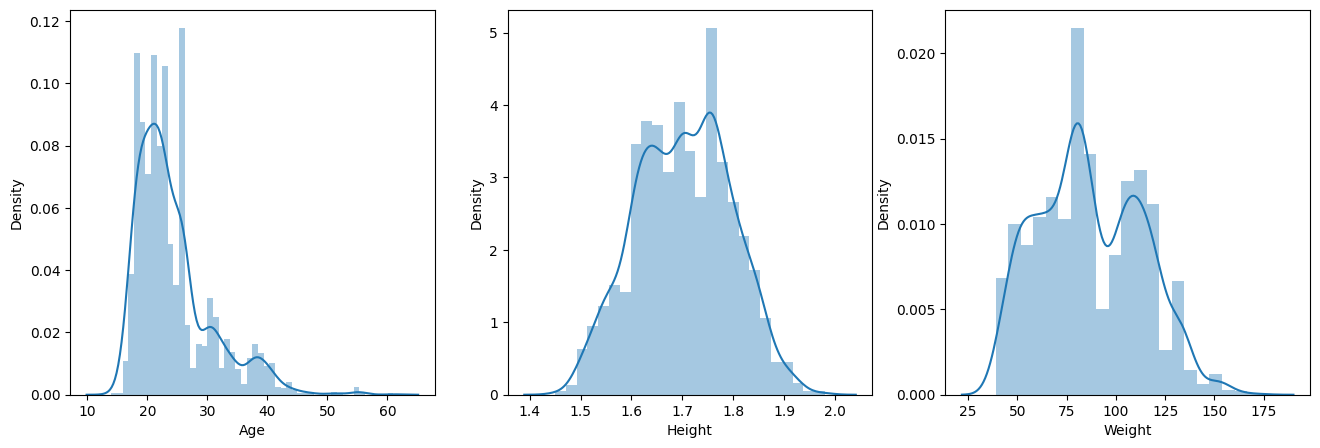

In [19]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(continuous_df['Age'])
plt.subplot(1,3,2)
sns.distplot(continuous_df['Height'])
plt.subplot(1,3,3)
sns.distplot(continuous_df['Weight'])
plt.show()

#### Q-Q Plot


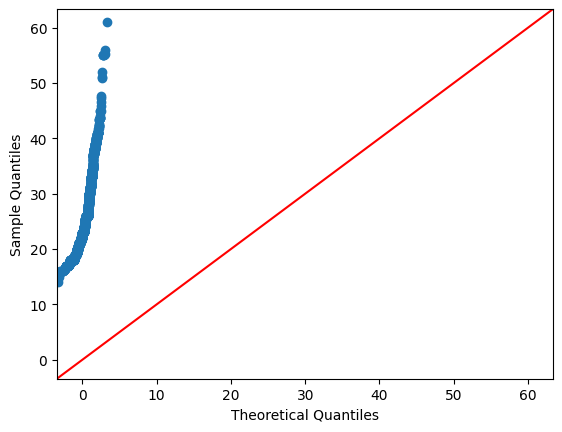

In [20]:
sm.qqplot(continuous_df['Age'], line='45')
plt.show()

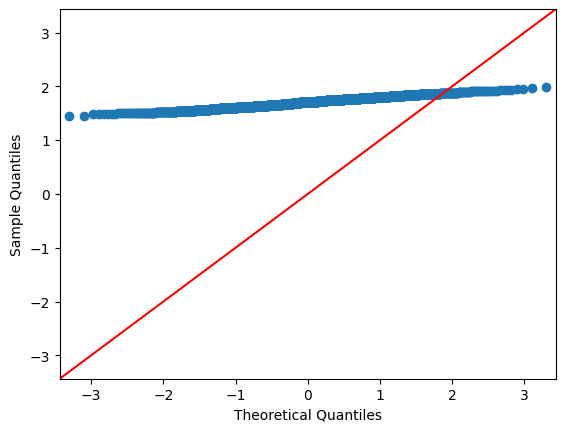

In [21]:
sm.qqplot(continuous_df['Height'], line='45')
plt.show()

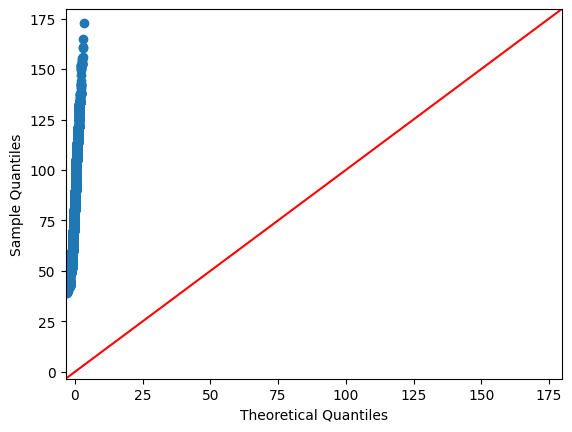

In [22]:
sm.qqplot(continuous_df['Weight'], line='45')
plt.show()

#### Skewness and Kurtosis


In [23]:
print("Age")
print(f"Kurtosis: {sp.kurtosis(continuous_df['Age'])}")
print(f"Skewness: {sp.skew(continuous_df['Age'])}")
print("Height")
print(f"Kurtosis: {sp.kurtosis(continuous_df['Height'])}")
print(f"Skewness: {sp.skew(continuous_df['Height'])}")
print("Weight")
print(f"Kurtosis: {sp.kurtosis(continuous_df['Weight'])}")
print(f"Skewness: {sp.skew(continuous_df['Weight'])}")

Age
Kurtosis: 2.758190274759725
Skewness: 1.5132163009104738
Height
Kurtosis: -0.5573653902930622
Skewness: -0.02472522704948489
Weight
Kurtosis: -0.7066627339474816
Skewness: 0.24172823035894342


#### Shapiro-Wilk Test


In [24]:
stat, p = sp.shapiro(continuous_df['Age'])
print('Statistics=%.3f, p=%.4f' % (stat, p))

Statistics=0.868, p=0.0000


In [25]:
stat, p = sp.shapiro(continuous_df['Height'])
print('Statistics=%.3f, p=%.4f' % (stat, p))

Statistics=0.993, p=0.0000


In [26]:
stat, p = sp.shapiro(continuous_df['Weight'])
print('Statistics=%.3f, p=%.4f' % (stat, p))

Statistics=0.977, p=0.0000


#### Result


Age: Heavily Right-Skewed. -> IQR<br>
Height: Slightly Left-Skewed. -> Percentile-Based<br>
Weight: Slightly Right-Skewed. -> Percentile-Based


### Outliers Detection


In [27]:
q1, q3 = eda_df['Age'].quantile([0.25, 0.75]).values
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

age_bounds = (eda_df['Age'] >= lower_bound) & (eda_df['Age'] <= upper_bound)
print(f"Age outlier count: {age_bounds.count() - age_bounds.sum()}")

Age outlier count: 167


In [28]:
p1, p99 = eda_df['Height'].quantile([0.01, 0.99]).values
height_bounds = (eda_df['Height'] >= p1) & (eda_df['Height'] <= p99)
print(f"Height outlier count: {height_bounds.count() - height_bounds.sum()}")

Height outlier count: 30


In [29]:
p1, p99 = eda_df['Weight'].quantile([0.01, 0.99]).values
weight_bounds = (eda_df['Weight'] >= p1) & (eda_df['Weight'] <= p99)
print(f"Weight outlier count: {weight_bounds.count() - weight_bounds.sum()}")

Weight outlier count: 42


In [30]:
df_without_outliers = eda_df.loc[age_bounds & height_bounds & weight_bounds]
print(f"Outlier portion: {round(((eda_df.shape[0] - df_without_outliers.shape[0]) / eda_df.shape[0])*100, 3)}%")

Outlier portion: 11.452%


In [31]:
print(f"Before outlier removal count: {eda_df.shape[0]}")
print(f"After outlier removal count: {df_without_outliers.shape[0]}")

Before outlier removal count: 2087
After outlier removal count: 1848


In [32]:
eda_df = eda_df.loc[age_bounds & height_bounds & weight_bounds]
eda_df.reset_index(drop=True, inplace=True)
eda_df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
1844,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
1845,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
1846,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


### Results


The dataset has around 11.4% outliers, all of them from Age, Height, and Weight. Because the outlier is more than 10% and they come from, theoritically, most contributing features, the decision is to not remove them, but let them be because they are most likely natural outliers.


## Data Balance


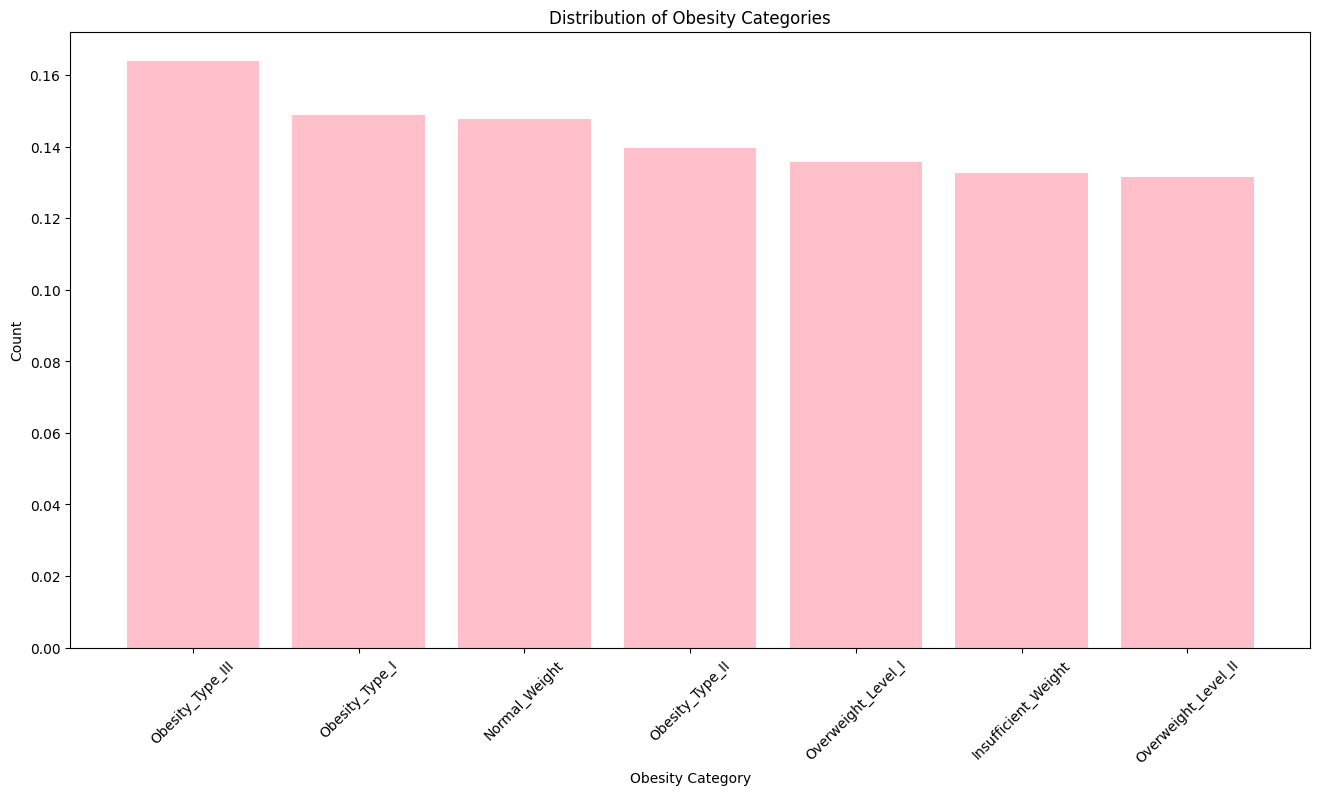

In [33]:
obesity_dist = eda_df['Obesity'].value_counts(normalize=True)

plt.figure(figsize=(16, 8))
plt.bar(obesity_dist.index, obesity_dist.values, color='pink')

plt.xlabel('Obesity Category')
plt.ylabel('Count')
plt.title('Distribution of Obesity Categories')
plt.xticks(rotation=45)

plt.show()

In [34]:
print(obesity_dist)

Obesity
Obesity_Type_III       0.163961
Obesity_Type_I         0.148810
Normal_Weight          0.147727
Obesity_Type_II        0.139610
Overweight_Level_I     0.135823
Insufficient_Weight    0.132576
Overweight_Level_II    0.131494
Name: proportion, dtype: float64


In [35]:
print(f"Max: {round(obesity_dist.max(), 3)}")
print(f"Min: {round(obesity_dist.min(), 3)}")

Max: 0.164
Min: 0.131


The attribute proportions are around ~0.128-10.168, which is balanced


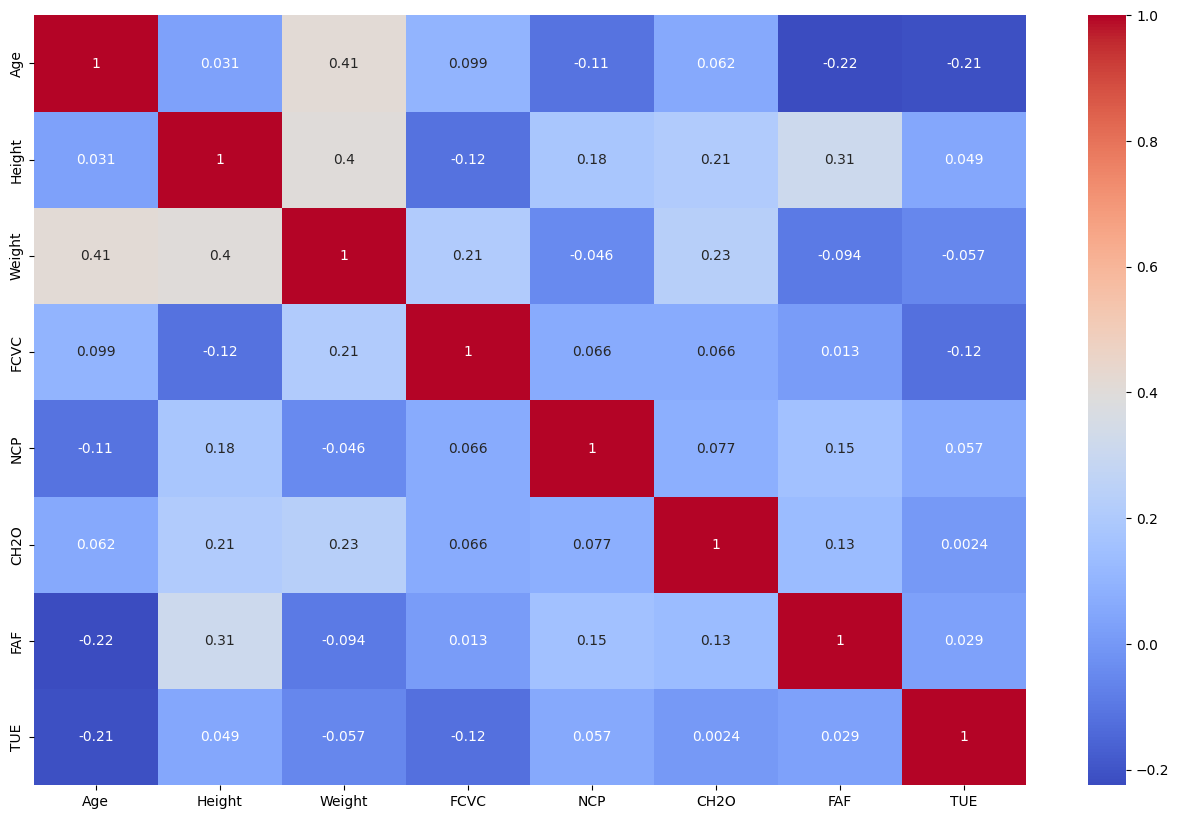

In [36]:
plt.figure(figsize=(16, 10))
sns.heatmap(eda_df.corr(method="spearman", numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [37]:
data_corr = eda_df.corr(method="spearman", numeric_only=True)
[(col, row) for col in data_corr.columns for row in data_corr.index if data_corr.loc[col, row] > 0.6 and col != row and col != 'Obesity' and row != 'Obesity']

[]

# 3. 🎨 Features Engineering


In [38]:
fe_df = eda_df.copy()

## 🔢 Data Encoding


### Determining Column Types


There are 2 main types of data, Numerical and Categorical.<br>
For numerical data, there are discrete and continuous data.<br>
For categorical data, there are ordinal and nominal data.


In [39]:
continuous_column_names = ['Age', 'Height', 'Weight', 'CH2O', 'FAF', 'TUE']
discrete_column_names = ['FCVC', 'NCP']
nominal_column_names = ['Gender', 'family_history', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']
ordinal_column_names = ['CAEC', 'CALC']
label = ['Obesity'] # Ordinal

### Ordinal Data

There are two Ordinal Columns: 'CAEC', and 'CALC'.


In [40]:
print(f"CAEC Unique Values: {fe_df['CAEC'].unique()}")
print(f"CALC Unique Values: {fe_df['CALC'].unique()}")

CAEC Unique Values: ['Sometimes' 'Frequently' 'Always' 'no']
CALC Unique Values: ['no' 'Sometimes' 'Frequently' 'Always']


It can be seen that both CAEC and CALC have the same unique values with both of them having ordinal data, which means each has a ranking of each own with evenly spaced category -> Ordinal Encoder.


In [41]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
fe_df[ordinal_column_names] = ordinal_encoder.fit_transform(fe_df[ordinal_column_names])
fe_df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,2.0,no,2.000000,no,0.000000,1.000000,3.0,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,2.0,yes,3.000000,yes,3.000000,0.000000,2.0,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,2.0,no,2.000000,no,2.000000,1.000000,1.0,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,2.0,no,2.000000,no,2.000000,0.000000,1.0,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,2.0,no,2.000000,no,0.000000,0.000000,2.0,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,2.0,no,1.728139,no,1.676269,0.906247,2.0,Public_Transportation,Obesity_Type_III
1844,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,2.0,no,2.005130,no,1.341390,0.599270,2.0,Public_Transportation,Obesity_Type_III
1845,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,2.0,no,2.054193,no,1.414209,0.646288,2.0,Public_Transportation,Obesity_Type_III
1846,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,2.0,no,2.852339,no,1.139107,0.586035,2.0,Public_Transportation,Obesity_Type_III


### Nominal Data


In [42]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Instantiate encoder with sparse_output=False for newer versions
one_hot_encoder = OneHotEncoder(sparse_output=False)

# Fit-transform
encoded_array = one_hot_encoder.fit_transform(fe_df[nominal_column_names])

# Create a DataFrame for the encoded values
encoded_df = pd.DataFrame(
    encoded_array,
    columns=one_hot_encoder.get_feature_names_out(nominal_column_names),
    index=fe_df.index
)

# Drop original nominal columns and concatenate encoded ones
fe_df = fe_df.drop(columns=nominal_column_names)
fe_df = pd.concat([fe_df, encoded_df], axis=1)
fe_df

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.0,2.000000,0.000000,1.000000,3.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.000000,1.520000,56.000000,3.0,3.0,2.0,3.000000,3.000000,0.000000,2.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,23.000000,1.800000,77.000000,2.0,3.0,2.0,2.000000,2.000000,1.000000,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27.000000,1.800000,87.000000,3.0,3.0,2.0,2.000000,2.000000,0.000000,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22.000000,1.780000,89.800000,2.0,1.0,2.0,2.000000,0.000000,0.000000,2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,20.976842,1.710730,131.408528,3.0,3.0,2.0,1.728139,1.676269,0.906247,2.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1844,21.982942,1.748584,133.742943,3.0,3.0,2.0,2.005130,1.341390,0.599270,2.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1845,22.524036,1.752206,133.689352,3.0,3.0,2.0,2.054193,1.414209,0.646288,2.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1846,24.361936,1.739450,133.346641,3.0,3.0,2.0,2.852339,1.139107,0.586035,2.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
fe_df.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE',
       'CALC', 'Obesity', 'Gender_Female', 'Gender_Male', 'family_history_no',
       'family_history_yes', 'FAVC_no', 'FAVC_yes', 'SMOKE_no', 'SMOKE_yes',
       'SCC_no', 'SCC_yes', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

### Label


In [44]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

target_order = [['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
                 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']]

label_oe = OrdinalEncoder(categories=target_order)

fe_df['Obesity'] = label_oe.fit_transform(fe_df[['Obesity']]).astype(int)
fe_df

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.0,2.000000,0.000000,1.000000,3.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.000000,1.520000,56.000000,3.0,3.0,2.0,3.000000,3.000000,0.000000,2.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,23.000000,1.800000,77.000000,2.0,3.0,2.0,2.000000,2.000000,1.000000,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27.000000,1.800000,87.000000,3.0,3.0,2.0,2.000000,2.000000,0.000000,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22.000000,1.780000,89.800000,2.0,1.0,2.0,2.000000,0.000000,0.000000,2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,20.976842,1.710730,131.408528,3.0,3.0,2.0,1.728139,1.676269,0.906247,2.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1844,21.982942,1.748584,133.742943,3.0,3.0,2.0,2.005130,1.341390,0.599270,2.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1845,22.524036,1.752206,133.689352,3.0,3.0,2.0,2.054193,1.414209,0.646288,2.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1846,24.361936,1.739450,133.346641,3.0,3.0,2.0,2.852339,1.139107,0.586035,2.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## 📋 Features Selection


# 4. ⚙️ Model Training


In [45]:
modelling_df = fe_df.copy()

## 📝 Evaluation


In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score, recall_score, precision_score, roc_curve, auc

def print_eval(model, X_train, X_test, y_train, y_test, df_X, df_y, cv=5, multi_class='ovo', average='macro'):
    print("Training Accuracy:", model.score(X_train, y_train))
    print("Test Accuracy:", model.score(X_test, y_test))
    
    scores = cross_val_score(model, df_X, df_y, cv=cv)
    print("Cross Validation Scores:", scores)
    print("Average CV Score:", scores.mean())

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_labels = np.unique(y_train)
    test_labels = np.unique(y_test)

    print(f'Train Confusion Matrix: {confusion_matrix(y_train, y_train_pred, labels=train_labels)}')
    print(f'Test Confusion Matrix: {confusion_matrix(y_test, y_test_pred, labels=test_labels)}')

    print(f'Train Recall Score: {recall_score(y_train, y_train_pred, labels=train_labels, average=average)}')
    print(f'Test Recall Score: {recall_score(y_test, y_test_pred, labels=test_labels, average=average)}')

    print(f'Train Precision Score: {precision_score(y_train, y_train_pred, labels=train_labels, average=average)}')
    print(f'Test Precision Score: {precision_score(y_test, y_test_pred, labels=test_labels, average=average)}')

    print(f'Train F1 Score: {f1_score(y_train, y_train_pred, labels=train_labels, average=average)}')
    print(f'Test F1 Score: {f1_score(y_test, y_test_pred, labels=test_labels, average=average)}')

## 💡 Model


In [47]:
df_X = modelling_df.drop(columns=['Obesity'])
df_y = modelling_df['Obesity']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, test_size=0.33, random_state=42
)
df_X.shape

(1848, 25)

In [49]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [50]:
print_eval(clf, X_train, X_test, y_train, y_test, df_X, df_y)

Training Accuracy: 0.8481421647819063
Test Accuracy: 0.7918032786885246
Cross Validation Scores: [0.6        0.84324324 0.84054054 0.84552846 0.84552846]
Average CV Score: 0.7949681388705779
Train Confusion Matrix: [[142  18   0   0   0   0   0]
 [  7 167   3  11   1   0   0]
 [  0  30 105  29   5   0   0]
 [  0  15   2 141  11   2   0]
 [  0   4   0  17 126  27   2]
 [  0   1   0   2   0 163   1]
 [  0   0   0   0   0   0 206]]
Test Confusion Matrix: [[64 21  0  0  0  0  0]
 [ 3 71  1  8  0  1  0]
 [ 0 19 39 19  5  0  0]
 [ 0  7  0 57  8  0  0]
 [ 0  3  0 15 65 16  0]
 [ 0  0  0  1  0 90  0]
 [ 0  0  0  0  0  0 97]]
Train Recall Score: 0.844131151050756
Test Recall Score: 0.7872903342927938
Train Precision Score: 0.8627038620160786
Test Precision Score: 0.8230650812516548
Train F1 Score: 0.8443490599639752
Test F1 Score: 0.7829253336976757


# 5. 🔍 Model Selection


In [63]:
# Model Selection: Logistic Regression, SVM, Random Forest, XGBoost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(kernel='rbf', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

scaled_X_train = X_train.copy()
scaled_X_test = X_test.copy()

scaler = StandardScaler()
scaled_X_train[continuous_column_names + discrete_column_names] = scaler.fit_transform(scaled_X_train[continuous_column_names + discrete_column_names])
scaled_X_test[continuous_column_names + discrete_column_names] = scaler.transform(scaled_X_test[continuous_column_names + discrete_column_names])

results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(scaled_X_train if name in ['Logistic Regression', 'Support Vector Machine'] else X_train, y_train)
    y_pred = model.predict(scaled_X_test if name in ['Logistic Regression', 'Support Vector Machine'] else X_test)
    print(f"Evaluation for {name}:")
    print(classification_report(y_test, y_pred))
    results[name] = {
        'model': model,
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

Training Logistic Regression...
Evaluation for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        85
           1       0.79      0.68      0.73        84
           2       0.75      0.68      0.71        82
           3       0.68      0.79      0.73        72
           4       0.92      0.84      0.88        99
           5       0.93      0.99      0.96        91
           6       1.00      1.00      1.00        97

    accuracy                           0.85       610
   macro avg       0.85      0.85      0.84       610
weighted avg       0.86      0.85      0.85       610

Training Support Vector Machine...
Evaluation for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        85
           1       0.77      0.74      0.75        84
           2       0.74      0.74      0.74        82
           3       0.78      0.86      0.82 

In [114]:
# Comparison of Models
import pandas as pd

# Compile accuracy, precision, recall, f1-score for each model
comparison = pd.DataFrame({
    name: {
        'accuracy': res['classification_report']['accuracy'],
        **{f"{cls}_{metric}": res['classification_report'][cls][metric]
            for cls in res['classification_report'] if cls not in ['accuracy','macro avg','weighted avg']
            for metric in ['precision','recall','f1-score']}
    }
    for name, res in results.items()
}).T

comparison.sort_values(by='accuracy', ascending=False)

,accuracy,0_precision,0_recall,0_f1-score,1_precision,1_recall,1_f1-score,2_precision,2_recall,2_f1-score,...,3_f1-score,4_precision,4_recall,4_f1-score,5_precision,5_recall,5_f1-score,6_precision,6_recall,6_f1-score
XGBoost,0.968852,1.000000,0.964706,0.982036,0.909091,0.952381,0.930233,0.948052,0.890244,0.918239,...,0.965986,0.980000,0.989899,0.984925,0.989011,0.989011,0.989011,1.0,1.0,1.0
Random Forest,0.944262,1.000000,0.894118,0.944099,0.783019,0.988095,0.873684,0.985075,0.804878,0.885906,...,0.912752,0.989583,0.959596,0.974359,1.000000,1.000000,1.000000,1.0,1.0,1.0
Support Vector Machine,0.880328,0.917647,0.917647,0.917647,0.765432,0.738095,0.751515,0.743902,0.743902,0.743902,...,0.815789,0.977273,0.868687,0.919786,0.938144,1.000000,0.968085,1.0,1.0,1.0
Logistic Regression,0.854098,0.852632,0.952941,0.900000,0.791667,0.678571,0.730769,0.746667,0.682927,0.713376,...,0.730769,0.922222,0.838384,0.878307,0.927835,0.989011,0.957447,1.0,1.0,1.0


In [75]:
f1_scores = {}
accuracies = {}
for name in models.keys():
  f1_scores[name] = results[name]['classification_report']['macro avg']['f1-score']
  accuracies[name] = results[name]['classification_report']['accuracy']

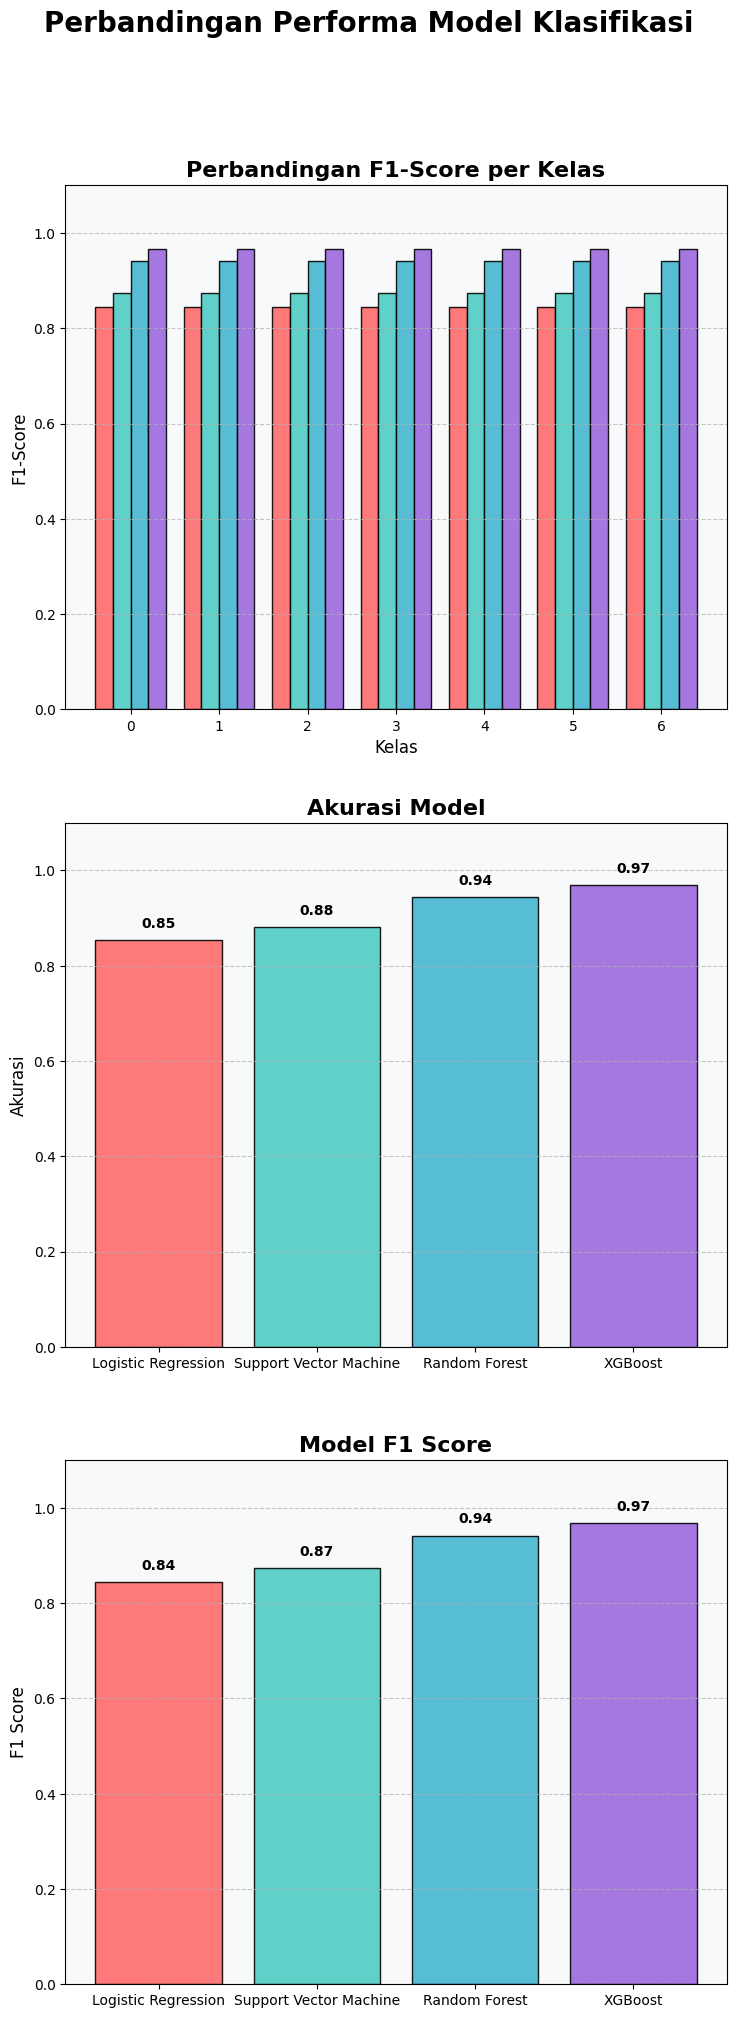

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Warna custom
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#9C6ADE']

classes = [0, 1, 2, 3, 4, 5, 6]

fig, axes = plt.subplots(3, 1, figsize=(8, 20))

axes = axes.flatten()

# ========================
# SUBPLOT 1: Perbandingan F1-Score per Kelas
# ========================

bar_width = 0.2
x_pos = np.arange(len(classes))

for i, model in enumerate(models.keys()):
    axes[0].bar(
        x_pos + i * bar_width,
        f1_scores[model],
        width=bar_width,
        color=colors[i],
        label=model,
        edgecolor='black',
        alpha=0.9
    )

axes[0].set_title('Perbandingan F1-Score per Kelas', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Kelas', fontsize=12)
axes[0].set_ylabel('F1-Score', fontsize=12)
axes[0].set_xticks(x_pos + bar_width * 1.5, classes)
axes[0].set_ylim(0, 1.1)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_facecolor('#f8f9fa')

# ========================
# SUBPLOT 2: Akurasi Model
# ========================

bars = axes[1].bar(accuracies.keys(), accuracies.values(), color=colors, edgecolor='black', alpha=0.9)

# Tambahkan label nilai di atas bar
for bar in bars:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.02,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontweight='bold'
    )

axes[1].set_title('Akurasi Model', fontsize=16, fontweight='bold')
axes[1].set_ylabel('Akurasi', fontsize=12)
axes[1].set_ylim(0, 1.1)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_facecolor('#f8f9fa')

# ========================
# SUBPLOT 3: Performa Model (Macro Avg F1-Score)
# ========================

bars = axes[2].bar(f1_scores.keys(), f1_scores.values(), color=colors, edgecolor='black', alpha=0.9)


for bar in bars:
    height = bar.get_height()
    axes[2].text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.02,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontweight='bold'
    )

axes[2].set_title('Model F1 Score', fontsize=16, fontweight='bold')
axes[2].set_ylabel('F1 Score', fontsize=12)
axes[2].set_ylim(0, 1.1)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)
axes[2].set_facecolor('#f8f9fa')

# ========================
# JUDUL UTAMA
# ========================
plt.suptitle('Perbandingan Performa Model Klasifikasi',
             fontsize=20,
             fontweight='bold',
             y=1.02)

plt.tight_layout(pad=3.0)
plt.show()

Even though XGBoost performs better than Random Forest Classifier. Random Forest performs better on medium-sized dataset while XGBoost needs a larger dataset size to reduce the possibility of overfitting. Random Forest algorithm's performance is not far off XGBoost, so it is a good trade-off.

# 6. 🎯 Hyperparameter Tuning


In [52]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=10)
X_rfe = rfe.fit_transform(df_X, df_y)

In [53]:
used_features = rfe.get_feature_names_out()
used_features

array(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF',
       'TUE', 'Gender_Male'], dtype=object)

In [54]:
rfe_X_train, rfe_X_test, rfe_y_train, rfe_y_test = train_test_split(
    X_rfe, df_y, test_size=0.33, random_state=42
)

In [55]:
rfe_clf = RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4,
                        n_estimators=175, random_state=0)
rfe_clf.fit(rfe_X_train, rfe_y_train)

print_eval(rfe_clf, rfe_X_train, rfe_X_test, rfe_y_train, rfe_y_test, X_rfe, df_y)

Training Accuracy: 0.8933764135702746
Test Accuracy: 0.8295081967213115
Cross Validation Scores: [0.71351351 0.88918919 0.87567568 0.87533875 0.89159892]
Average CV Score: 0.8490632095510146
Train Confusion Matrix: [[153   7   0   0   0   0   0]
 [  6 171   7   5   0   0   0]
 [  0  18 126  24   1   0   0]
 [  0   7  21 132   9   2   0]
 [  0   1   0  14 154   7   0]
 [  0   1   0   0   1 164   1]
 [  0   0   0   0   0   0 206]]
Test Confusion Matrix: [[78  7  0  0  0  0  0]
 [ 3 75  2  4  0  0  0]
 [ 0 13 52 17  0  0  0]
 [ 0  3 17 43  9  0  0]
 [ 0  0  0 15 72 12  0]
 [ 0  0  0  0  2 89  0]
 [ 0  0  0  0  0  0 97]]
Train Recall Score: 0.8907913982349337
Test Recall Score: 0.8210239243801449
Train Precision Score: 0.892193902706571
Test Precision Score: 0.8219464639153476
Train F1 Score: 0.8908528390900861
Test F1 Score: 0.8187859958278699


In [56]:
hyperparameters = {
  'n_estimators': np.linspace(100, 500, 17, dtype=int),
  'criterion': ["gini", "entropy"],
  'max_depth': np.linspace(1, 10, 10, dtype=int),
  'min_samples_split': np.linspace(1, 6, 6, dtype=int),
  'min_samples_leaf': np.linspace(1, 6, 6, dtype=int),
  'max_features': ["sqrt", "log2"]
}
hyperparameters

{'n_estimators': array([100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400,
        425, 450, 475, 500]),
 'criterion': ['gini', 'entropy'],
 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'min_samples_split': array([1, 2, 3, 4, 5, 6]),
 'min_samples_leaf': array([1, 2, 3, 4, 5, 6]),
 'max_features': ['sqrt', 'log2']}

In [57]:
from sklearn.model_selection import RandomizedSearchCV
grid_search_cv = RandomizedSearchCV(rfe_clf, hyperparameters, verbose=2, n_jobs=-1, scoring='f1_macro', n_iter=500)
grid_search_cv.fit(rfe_X_train, rfe_y_train)
print(grid_search_cv.best_estimator_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


KeyboardInterrupt: 

In [ ]:
rfe_tuned_clf = grid_search_cv.best_estimator_

rfe_tuned_clf.fit(rfe_X_train, rfe_y_train)

RandomForestClassifier(criterion='entropy', max_depth=np.int64(10),
                       min_samples_leaf=np.int64(2),
                       min_samples_split=np.int64(3),
                       n_estimators=np.int64(175), random_state=0)

In [ ]:
print_eval(rfe_tuned_clf, rfe_X_train, rfe_X_test, rfe_y_train, rfe_y_test, X_rfe, df_y)

Training Accuracy: 0.9975767366720517
Test Accuracy: 0.9426229508196722
Cross Validation Scores: [0.83783784 0.97837838 0.97837838 0.9701897  0.98373984]
Average CV Score: 0.9497048267779975
Train Confusion Matrix: [[159   1   0   0   0   0   0]
 [  0 189   0   0   0   0   0]
 [  0   1 168   0   0   0   0]
 [  0   0   0 171   0   0   0]
 [  0   0   0   0 176   0   0]
 [  0   0   0   0   0 166   1]
 [  0   0   0   0   0   0 206]]
Test Confusion Matrix: [[80  5  0  0  0  0  0]
 [ 0 79  4  1  0  0  0]
 [ 0  7 69  6  0  0  0]
 [ 0  1  3 64  4  0  0]
 [ 0  0  0  2 95  2  0]
 [ 0  0  0  0  0 91  0]
 [ 0  0  0  0  0  0 97]]
Train Recall Score: 0.9974064023263701
Test Recall Score: 0.9388001320262029
Train Precision Score: 0.997813982562446
Test Precision Score: 0.9401990430050021
Train F1 Score: 0.9976014823296453
Test F1 Score: 0.9389038541444933


In [ ]:
from sklearn.metrics import log_loss

max_depth = np.linspace(1, 20, 20, dtype=np.int64)
train_loss = []
test_loss = []

for i in range(1, 20 + 1):
    rfe_tuned_clf = RandomForestClassifier(criterion='entropy', max_depth=i,
                        min_samples_leaf=np.int64(1),
                        min_samples_split=np.int64(2),
                        max_features='sqrt',
                        n_estimators=np.int64(500), random_state=0)
    
    rfe_tuned_clf.fit(rfe_X_train, rfe_y_train)

    train_loss.append(log_loss(rfe_y_train, rfe_tuned_clf.predict_proba(rfe_X_train)))
    test_loss.append(log_loss(rfe_y_test, rfe_tuned_clf.predict_proba(rfe_X_test)))

train_loss
test_loss

[1.5988874398944501,
 1.2684616800884148,
 1.0190002852475366,
 0.8148542263907983,
 0.6338473265135564,
 0.502452060703316,
 0.39885836392140345,
 0.33098408939754137,
 0.29114377382122086,
 0.2703758768270215,
 0.26296412460321067,
 0.25498741007769327,
 0.2517056803912199,
 0.2512239806190469,
 0.2499273410005042,
 0.2495940015758413,
 0.24975098111050567,
 0.24974989254454225,
 0.2497934037379327,
 0.2497934037379327]

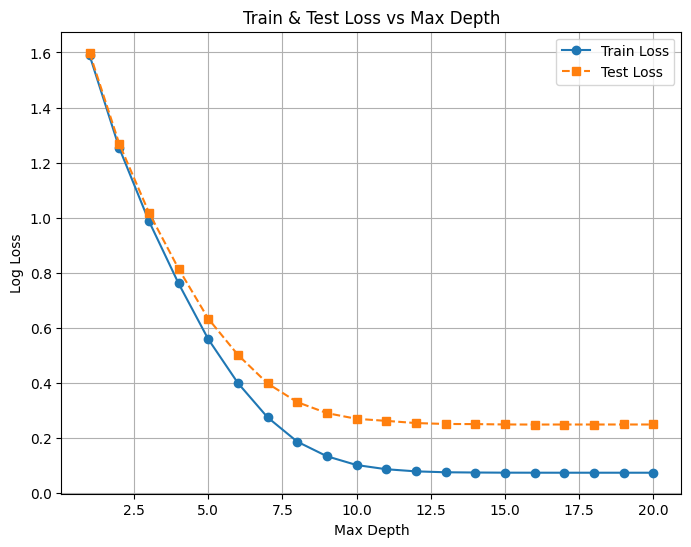

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(max_depth, train_loss, label="Train Loss", marker='o', linestyle='-')
plt.plot(max_depth, test_loss, label="Test Loss", marker='s', linestyle='--')

plt.xlabel("Max Depth")
plt.ylabel("Log Loss")
plt.title("Train & Test Loss vs Max Depth")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
final_model = RandomForestClassifier(
                                      criterion='entropy',
                                      max_depth=np.int64(12),
                                      min_samples_leaf=np.int64(1),
                                      min_samples_split=np.int64(2),
                                      max_features='sqrt',
                                      n_estimators=np.int64(500),
                                      random_state=0
                                    )

final_model.fit(rfe_X_train, rfe_y_train)

RandomForestClassifier(criterion='entropy', max_depth=np.int64(12),
                       min_samples_leaf=np.int64(1),
                       min_samples_split=np.int64(2),
                       n_estimators=np.int64(500), random_state=0)

In [ ]:
print_eval(final_model, rfe_X_train, rfe_X_test, rfe_y_train, rfe_y_test, X_rfe, df_y)

Training Accuracy: 1.0
Test Accuracy: 0.9573770491803278
Cross Validation Scores: [0.84594595 0.98378378 0.97837838 0.98102981 0.98373984]
Average CV Score: 0.9545755511609169
Train Confusion Matrix: [[160   0   0   0   0   0   0]
 [  0 189   0   0   0   0   0]
 [  0   0 169   0   0   0   0]
 [  0   0   0 171   0   0   0]
 [  0   0   0   0 176   0   0]
 [  0   0   0   0   0 167   0]
 [  0   0   0   0   0   0 206]]
Test Confusion Matrix: [[80  5  0  0  0  0  0]
 [ 0 81  3  0  0  0  0]
 [ 0  7 72  3  0  0  0]
 [ 0  0  3 67  2  0  0]
 [ 0  0  0  2 96  1  0]
 [ 0  0  0  0  0 91  0]
 [ 0  0  0  0  0  0 97]]
Train Recall Score: 1.0
Test Recall Score: 0.9548233558020399
Train Precision Score: 1.0
Test Precision Score: 0.9561889274407521
Train F1 Score: 1.0
Test F1 Score: 0.9549516530009209


In [ ]:
feature_importance = []

for feat in zip(rfe.get_feature_names_out(), final_model.feature_importances_):
  feature_importance.append((feat))

feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

for feat, importance in feature_importance:
  print(f"{feat}'s importance: {importance:.4f}")

Age's importance: 0.4062
CH2O's importance: 0.1241
FAF's importance: 0.1120
TUE's importance: 0.1110
Height's importance: 0.0718
FCVC's importance: 0.0623
NCP's importance: 0.0597
Weight's importance: 0.0529


# 7. 🚀 Model Deployment


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from typing import List, Any

def get_union(first_list: List[Any], second_list: List[Any]) -> List[Any]:
    return list(set(first_list).intersection(second_list))

preprocessor = ColumnTransformer([
    ('ordinal', ordinal_encoder, get_union(ordinal_column_names, used_features)),
    ('onehot', one_hot_encoder, get_union(nominal_column_names, used_features)),
    ('passthrough', 'passthrough', get_union(discrete_column_names + continuous_column_names, used_features)),
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', final_model)
])

rfe_X_train_df = pd.DataFrame(rfe_X_train, columns=used_features)

preprocessor.fit(rfe_X_train_df, rfe_y_train)

pipeline.fit(rfe_X_train_df, rfe_y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  []),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False),
                                                  []),
                                                 ('passthrough', 'passthrough',
                                                  ['Weight', 'NCP', 'CH2O',
                                                   'FAF', 'TUE', 'FCVC',
                                                   'Height', 'Age'])])),
                ('model',
                 RandomForestClassifier(criterion='entropy',
                                        max_depth=np.int64(12),
                                        min_samples_leaf=np.int64(1),
                                        min_samples_split=np.int64(2),
                                        n_estimators=np.int64(500),
                                        random_state=0))])

In [ ]:
import pickle

filename = "model.pkl"
pickle.dump(pipeline, open(filename, 'wb'))